In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
# LIF
T = 200
dt = 0.1
time_lif = np.arange(0, T, dt)

tau_m = 20     # membrane time constant (ms)
V_rest = -65   # resting potential (mV)
V_reset = -65
V_th = -50     # firing threshold (mV)

V = V_rest

I = np.zeros(len(time_lif))
I[500:1500] = 10
V_lif = []
spike_times = []

for i, t in enumerate(time_lif):
    dV = (-(V - V_rest) + I[i]) / tau_m
    V += dV * dt

    if V >= V_th:
        V_lif.append(30)
        spike_times.append(t)
        V = V_reset
    else:
        V_lif.append(V)


In [7]:
# Izhikevich model
T = 200
dt = 0.5
time_izh = np.arange(0, T, dt)

a = 0.02
b = 0.2
c = -65
d = 8

v = -65
u = b * v

I = np.zeros(len(time_izh))
I[100:300] = 10

v_izh = []
spike_times = []

for i, t in enumerate(time_izh):
    if v >= 30:
        v_izh.append(30)
        spike_times.append(t)
        v = c
        u += d
    else:
        v_izh.append(v)
        dv = (0.04*v*v + 5*v + 140 - u + I[i]) * dt
        du = (a*(b*v - u)) * dt
        v += dv
        u += du


In [9]:
# hodgkin-huxley neuron model
T = 200        # ms
dt = 0.01      # small timestep (important)
time_hh = np.arange(0, T, dt)

C_m = 1.0      # membrane capacitance

g_Na = 120.0
g_K = 36.0
g_L = 0.3

E_Na = 50
E_K = -77
E_L = -54.4

V = -65
m = 0.05
h = 0.6
n = 0.32

I = np.zeros(len(time_hh))
I[int(50/dt):int(150/dt)] = 10

def alpha_m(V): return (0.1*(V+40))/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4*np.exp(-(V+65)/18)

def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))

def alpha_n(V): return (0.01*(V+55))/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)

V_hh = []

for i in range(len(time_hh)):
    # Ionic currents
    I_Na = g_Na * (m**3) * h * (V - E_Na)
    I_K = g_K * (n**4) * (V - E_K)
    I_L = g_L * (V - E_L)

    dV = (I[i] - I_Na - I_K - I_L) / C_m
    V += dV * dt

    m += (alpha_m(V)*(1-m) - beta_m(V)*m) * dt
    h += (alpha_h(V)*(1-h) - beta_h(V)*h) * dt
    n += (alpha_n(V)*(1-n) - beta_n(V)*n) * dt

    V_hh.append(V)


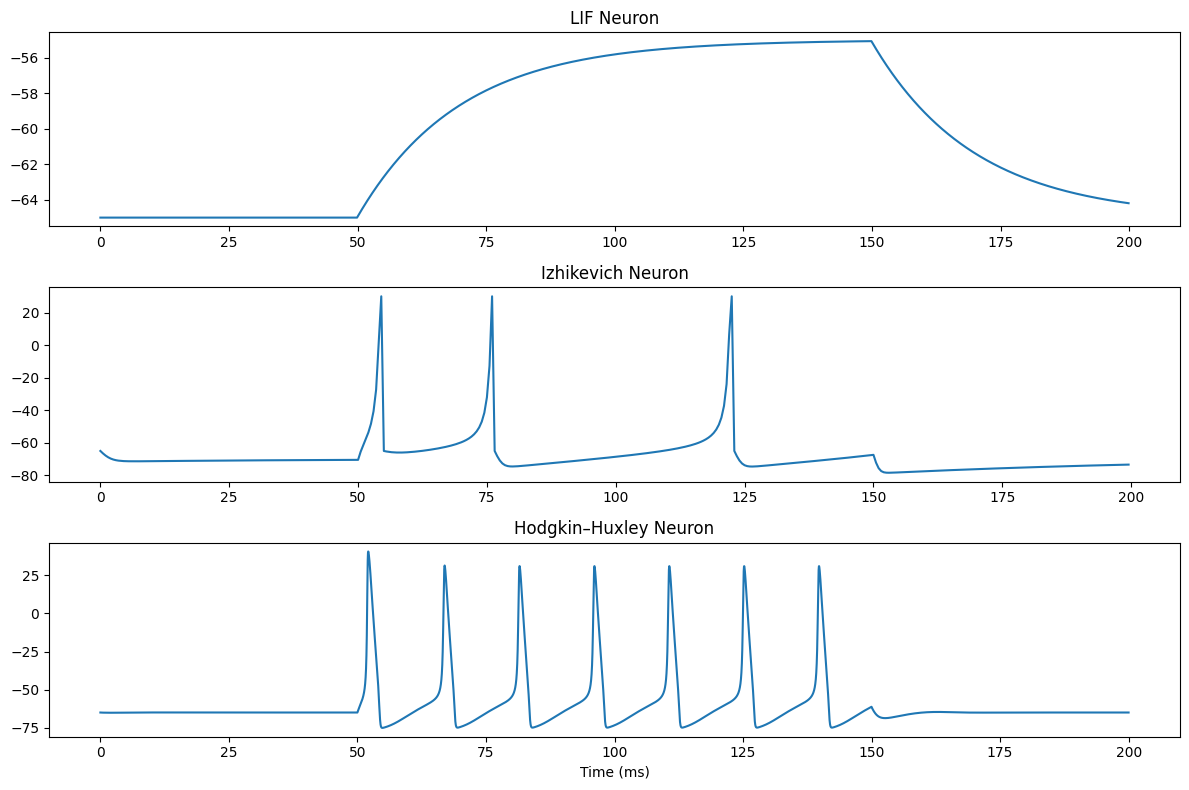

In [11]:
# Compare 
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(time_lif, V_lif)
plt.title("LIF Neuron")

plt.subplot(3,1,2)
plt.plot(time_izh, v_izh)
plt.title("Izhikevich Neuron")

plt.subplot(3,1,3)
plt.plot(time_hh, V_hh)
plt.title("Hodgkin–Huxley Neuron")

plt.xlabel("Time (ms)")
plt.tight_layout()
plt.show()


In [12]:
# computational cost
start = time.time()
# run LIF
lif_time = time.time() - start

start = time.time()
# run Izhikevich
izh_time = time.time() - start

start = time.time()
# run HH
hh_time = time.time() - start

print("LIF time:", lif_time)
print("Izhikevich time:", izh_time)
print("Hodgkin–Huxley time:", hh_time)


LIF time: 0.0001735687255859375
Izhikevich time: 0.0001251697540283203
Hodgkin–Huxley time: 0.00017118453979492188


## Comparative Analysis

The LIF model is computationally efficient but lacks biological realism,
producing stereotyped spiking behavior.

The Hodgkin Huxley model provides highly detailed and biologically accurate
action potentials but requires a very small time step and significantly
higher computational cost.

The Izhikevich model achieves a balance between these extremes, reproducing
diverse cortical firing patterns with minimal computational overhead.
This supports the central argument of Izhikevich (2004) regarding the
trade-off between biological realism and computational efficiency.
